In [ ]:
# !pip install keras

In [ ]:
# !pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 596.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


In [ ]:
# nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Dense,BatchNormalization,Flatten,Dropout
from keras import Sequential
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [ ]:
df = pd.read_csv('/content/googleplaystore_user_reviews.csv',encoding='latin-1')

In [ ]:
df.head()

,App,Translated_Review,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive
2,10 Best Foods for You,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive
4,10 Best Foods for You,Best idea us,Positive


In [ ]:
df=df.drop('App',axis=1)

In [ ]:
df.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive


In [ ]:
df=df.rename(columns={'Translated_Review':'review','Sentiment':'sentiment'})

In [ ]:
df.head()

,review,sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     37427 non-null  object
 1   sentiment  37432 non-null  object
dtypes: object(2)
memory usage: 1004.7+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
df.describe()

,review,sentiment
count,37427,37427
unique,27994,3
top,Good,Positive
freq,247,23998


<Axes: xlabel='sentiment'>

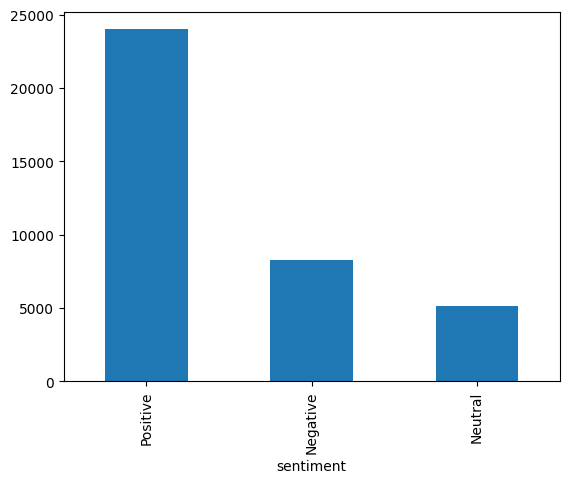

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

In [ ]:
# text preprocessing

In [ ]:
def preprocessing_pipeline(text):
  lemmatizer=WordNetLemmatizer()
  if str(type(text)) != "<class 'str'>":
    text=list(text)
    corpus=[]
    for i in range(len(text)):
      review=re.sub('[^a-zA-Z]',' ',text[i])
      review=review.lower()
      review=review.split()
      r=[word for word in review if not word in stopwords.words('english')]
      r=[lemmatizer.lemmatize(word) for word in r]
      r=' '.join(r)
      corpus.append(r)
    return corpus
  else:
    review=re.sub('[^a-zA-Z]',' ',text[i])
    review=review.lower()
    review=review.split()
    r=[word for word in review if not word in stopwords.words('english')]
    r=[lemmatizer.lemmatize(word) for word in r]
    r=' '.join(r)
    return r

In [ ]:
preprocessed_text=preprocessing_pipeline(df['review'])
print(preprocessed_text)

['like eat delicious food cooking food case best food help lot also best shelf life', 'help eating healthy exercise regular basis', 'work great especially going grocery store', 'best idea u', 'best way', 'amazing', 'looking forward app', 'helpful site help food get', 'good', 'useful information amount spelling error question validity information shared fixed star given', 'thank great app add arthritis eye immunity kidney liver detox food please', 'greatest ever completely awesome maintain health must ppl love', 'good health good health first priority', 'health important world either life think', 'mr sunita bhati thankful developer make kind app really good healthy food body', 'useful diabetes age need control sugar thanks', 'one greatest apps', 'good nice', 'healthy really helped', 'god health', 'health always top priority mysg', 'excellent useful', 'found lot wealth form health', 'found important', 'healthy eating', 'good simply good', 'test', 'good', 'thanks advice downloaded adobe r

In [ ]:
df['review']=preprocessed_text
df.head()

,review,sentiment
0,like eat delicious food cooking food case best...,Positive
1,help eating healthy exercise regular basis,Positive
3,work great especially going grocery store,Positive
4,best idea u,Positive
5,best way,Positive


In [ ]:
df['sentiment'].replace({"Positive":0,"Negative":1,"Neutral":2},inplace=True)
df.sample(5)

/tmp/ipython-input-17-831125082.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].replace({"Positive":0,"Negative":1,"Neutral":2},inplace=True)
/tmp/ipython-input-17-831125082.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'].replace({"Positive":0,"Negative":1,"Ne

,review,sentiment
627,amazing app easy intuitive found half redbeans...,0
26965,game definitive pay win game matchmaking syste...,1
64145,recent update audio end closed even remove rec...,1
47542,game fun challenging ad aggressive hint button...,0
58360,loaded sure yet,0


In [ ]:
x=df['review']
y=df['sentiment']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(29941,) (7486,) (29941,) (7486,)


In [ ]:
#Feature Extraction

In [ ]:
# !pip install gensim

In [ ]:
from gensim.models import Word2Vec,KeyedVectors
import gensim.downloader as api
path=api.load('word2vec-google-news-300')
print(path)

KeyedVectors<vector_size=300, 3000000 keys>


In [ ]:
#generating embeddings ---
def vectorize(sentence):
  words=sentence.split()
  words_vectors=[path[word] for word in words if word in path]
  if len(words_vectors)==0:
    return np.zeros(300)
  word_vecs=np.array(words_vectors)
  return word_vecs.mean(axis=0)
xtrain_embed_google=np.array([vectorize(sentence) for sentence in xtrain])
xtest_embed_google=np.array([vectorize(sentence) for sentence in xtest])

In [ ]:
# usING Bag of Words--

model=Sequential()
model.add(Dense(128,input_shape=(300,),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,403 (196.89 KB)

 Trainable params: 49,923 (195.01 KB)

 Non-trainable params: 480 (1.88 KB)

None


In [ ]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(xtrain_embed_google,np.array(ytrain,dtype='float32'),epochs=20,batch_size=4,validation_split=0.2)

Epoch 1/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.6748 - loss: 0.7408 - val_accuracy: 0.7400 - val_loss: 0.6623
Epoch 2/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7095 - loss: 0.6906 - val_accuracy: 0.7362 - val_loss: 0.6776
Epoch 3/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7145 - loss: 0.6765 - val_accuracy: 0.7515 - val_loss: 0.6372
Epoch 4/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7310 - loss: 0.6521 - val_accuracy: 0.7429 - val_loss: 0.6390
Epoch 5/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7384 - loss: 0.6337 - val_accuracy: 0.7497 - val_loss: 0.6847
Epoch 6/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7461 - loss: 0.6228 - val_accuracy: 0.7692 - val_loss: 0.6140
Epoch 7/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7493 - loss: 0.6147 - val_accuracy: 0.7258 - val_loss: 0.6531
Epoch 8/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7503 - loss: 0

In [ ]:
p=model.predict(xtest_embed_google)
p=np.argmax(p,axis=1)
print(p)

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0 2 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
d=pd.DataFrame(confusion_matrix(ytest,p),columns=['Positive','Neutral','Negative'],index=['Positive','Neutral','Negative'])
print(d)
print(classification_report(ytest,p))

          Positive  Neutral  Negative
Positive      4592      100        92
Neutral        961      641        51
Negative       352      168       529
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4784
           1       0.71      0.39      0.50      1653
           2       0.79      0.50      0.61      1049

    accuracy                           0.77      7486
   macro avg       0.76      0.62      0.66      7486
weighted avg       0.76      0.77      0.75      7486

